## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 : 채승혜
- 점수 :97 
    - 5번에 1개(표준오차 안써서...)틀림

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

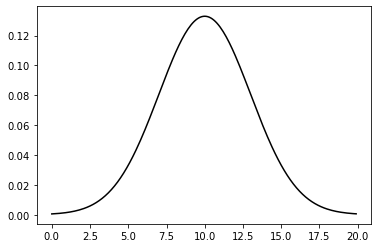

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x= np.arange(0,20,0.1) 

plt.plot(x,stats.norm.pdf(x=x,loc=10,scale=3),color='k')



Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

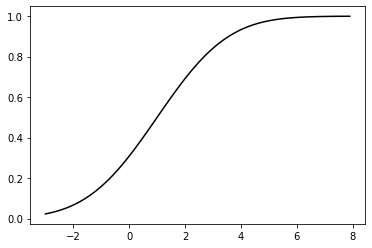

In [76]:
x= np.arange(-3,8,0.1)

plt.plot(x,stats.norm.cdf(x=x,loc=1,scale=2),color='k')


               

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [77]:
# 1  df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
import pandas as pd
df1 = pd.read_csv('dataset/5_2_fm.csv')
df1.head()

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8


In [142]:
df2=df1.copy()

In [145]:
df2.loc[df2.species=='A','species']='C'
df2.loc[df2.species=='B','species']='D'

df2.head()


,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8


In [153]:
# df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성
df2.loc[df2.species=='C','length']= df2.loc[df2.species=='C','length']*2
df2.loc[df2.species=='D','length']= df2.loc[df2.species=='D','length']*3

df= pd.concat([df1,df2],axis=0)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,4
1,C,6
2,C,8
3,D,18


In [80]:
# df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [155]:
df.groupby('species').mean()

,length
species,
A,3
B,8
C,6
D,24


In [156]:
df.groupby('species').std()

,length
species,
A,1.0
B,2.0
C,2.0
D,6.0


Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [166]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")

shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [191]:
shoes1= shoes.copy()
df= pd.concat([shoes,shoes1],axis=0)
df



,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [186]:
table= df.pivot_table(index='store',columns='color',values='sales',aggfunc='sum')
table


color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도, 표준오차
- 신뢰구간 계산 

In [83]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [84]:
#1 
md= np.mean(fish)
md

4.187039324504523

In [192]:
#2
mv= np.var(fish,ddof=1)
mv

0.6803017080832623

In [ ]:
# # A2.
# df = len(fish) - 1
# print('자유도:',df)
# sigma = np.std(fish,ddof=1)
# se = sigma/np.sqrt(len(fish))
# print('표준오차:',round(se,2))

In [86]:
# 3

df= len(fish)-1
df

9

In [87]:
# 4

interval= stats.t.interval(alpha=0.95,df=df,loc=md,scale=mv)
interval

(2.8019848809155885, 5.572093768093458)

Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [88]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [89]:
titanic_table= titanic.pivot_table(index=['pclass'],columns=['sex'],values=['survived'],aggfunc='mean')
titanic_table

survived          
sex       female      male
pclass                    
1       0.965278  0.340782
2       0.886792  0.146199
3       0.490741  0.152130

<AxesSubplot:xlabel='None-sex', ylabel='pclass'>

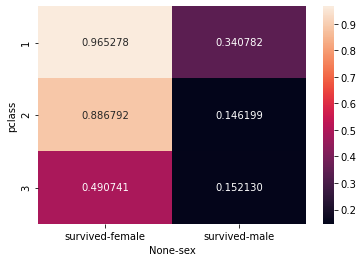

In [90]:
import seaborn as sns
sns.heatmap(titanic_table,annot=True, fmt='f')

# 숫자입력/ 실수입력

# 여자가 남자보다 생존율이 월등히 높다 
# pclass가 높을수록 생존률이 높으며, pclass가 1인 여자들은 높은 확률로 생존했다.


Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [91]:
a= np.random.randint(0,10, size=(4,5))
b= np.random.randint(10,20, size=(5,3))

np.dot(a,b)

array([[304, 289, 257],
       [224, 183, 168],
       [274, 196, 245],
       [ 91,  95,  76]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [98]:
import pandas as pd
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)


   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

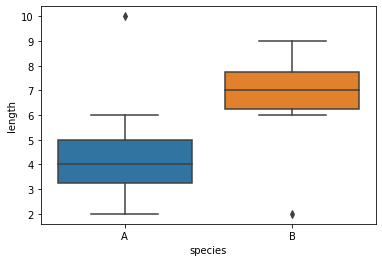

In [103]:

sns.boxplot(x='species',y='length',data=fish_multi)

In [110]:
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

In [116]:
group_A= fish_multi.groupby('species').get_group('A')
group_B= fish_multi.groupby('species').get_group('B')

Q1_A= group_A.length.describe()['25%']
Q2_A= group_A.length.describe()['75%']

Q1_B= group_B.length.describe()['25%']
Q2_B= group_B.length.describe()['75%']

iqr_A= Q2_A - Q1_A
iqr_B= Q2_B - Q1_B

upper_A= Q2_A + iqr_A*1.5

lower_B= Q1_B - iqr_B*1.5

A_sort= group_A.length.sort_values(ascending=False)
B_sort= group_B.length.sort_values(ascending=True)

print('A의 이상치')
print(group_A.loc[group_A.length>upper_A])

print()
print('B의 이상치')
print(group_B.loc[group_B.length<lower_B])


A의 이상치
  species  length
5       A      10

B의 이상치
   species  length
10       B       2


<AxesSubplot:xlabel='species', ylabel='length'>

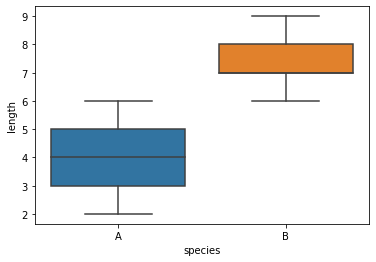

In [187]:
fish_multi.drop([5,10],axis=0,inplace=True)
sns.boxplot(x='species',y='length',data=fish_multi)

<AxesSubplot:xlabel='species', ylabel='length'>

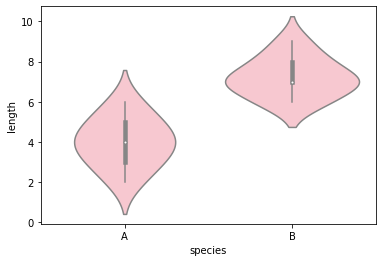

In [189]:
sns.violinplot(x='species',y='length',data=fish_multi, color='pink')

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

In [119]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:xlabel='mpg', ylabel='weight'>

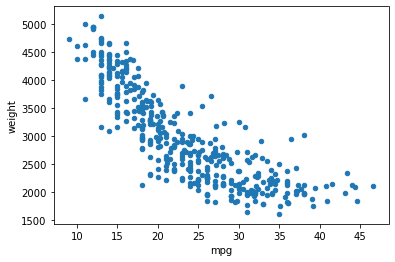

In [124]:
df_auto.plot(x='mpg',y='weight',kind='scatter')

In [ ]:
# mpg가 높아질수록 meight가 낮아지는 상관관계를 보인다. 

<AxesSubplot:ylabel='Frequency'>

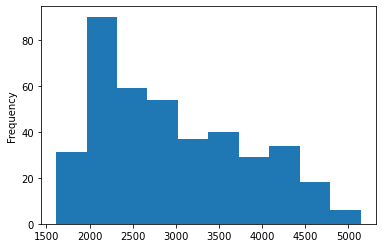

In [130]:
df_auto.weight.plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

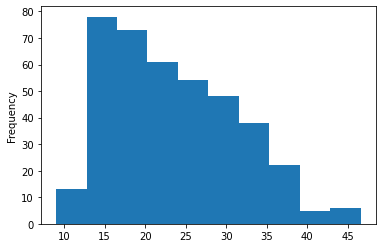

In [131]:
df_auto.mpg.plot(kind='hist', bins=10)

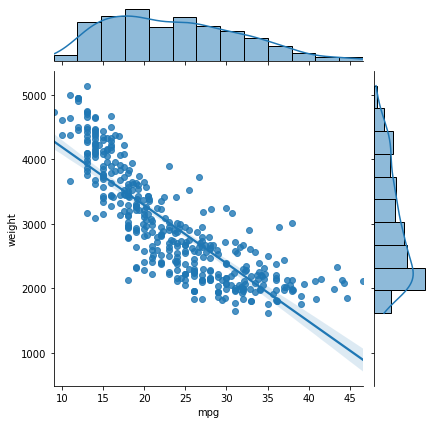

In [135]:
import warnings 
warnings.filterwarnings('ignore')

sns.jointplot(df_auto.mpg, df_auto.weight, kind='reg')

In [ ]:
# mpg 와 weight는 반비례하는 양상의 상관관계가 있다.

Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

In [139]:
population = stats.norm(loc = 4, scale = 0.8)

Text(0, 0.5, 'sample_var')

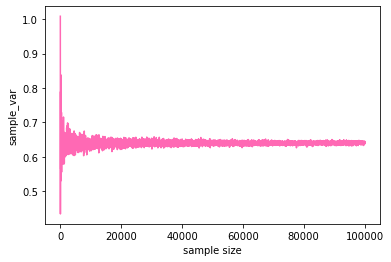

In [140]:
np.random.seed(1)

sample_size= np. arange(10,100010,10)  

sample_var_array= np.zeros(len(sample_size))

for i in range(0,len(sample_size)):
    sample= population.rvs(sample_size[i])
    sample_var_array[i]=np.var(sample,ddof=1)
    
plt.plot(sample_size, sample_var_array, color='hotpink')

plt.xlabel('sample size')
plt.ylabel('sample_var')